# Example for analyzing data with MCdata

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import MCdata
sns.set_context("talk")

## Load Data with MCdata

In [2]:
mcdata = MCdata.MCdata("../Data/L_72-dlongA0_example")

mcdata.rawdata

,temperature,field,Bin,Chern,M,M2,M4,E,E2
0,0.32728,0.00,0,-0.716283,0.015604,0.000289,1.438379e-07,-2.895437,8.383577
1,0.33343,0.00,0,-0.941849,0.015544,0.000287,1.402349e-07,-2.888744,8.344865
2,0.33970,0.00,0,-0.942478,0.016168,0.000308,1.578053e-07,-2.882060,8.306296
3,0.34609,0.00,0,-1.181867,0.016240,0.000311,1.619764e-07,-2.875094,8.266194
4,0.35259,0.00,0,-1.036726,0.016588,0.000324,1.744086e-07,-2.868078,8.225898
...,...,...,...,...,...,...,...,...,...
53995,2.22774,0.49,9,-23.370937,0.077219,0.006150,4.237939e-05,-0.803239,0.645678
53996,2.26961,0.49,9,-21.522423,0.074628,0.005747,3.703608e-05,-0.782844,0.613320
53997,2.31227,0.49,9,-18.410362,0.071847,0.005345,3.244431e-05,-0.762968,0.582583
53998,2.35572,0.49,9,-18.975220,0.068608,0.004878,2.708866e-05,-0.743582,0.553387


## Get data(mean/error) from raw binning data

In [3]:
dfpoints = mcdata.pointdata()

In [4]:
dfpoints

,temperature,field,Chern,M,M2,M4,E,E2,Chern_err,M_err,M2_err,M4_err,E_err,E2_err
0,0.32728,0.00,0.489179,0.015645,0.000290,1.423687e-07,-2.896326,8.388728,0.267388,0.000051,0.000002,1.792238e-09,0.000143,0.000829
1,0.33343,0.00,0.510852,0.015758,0.000294,1.471556e-07,-2.889748,8.350664,0.265705,0.000063,0.000002,2.333287e-09,0.000152,0.000877
2,0.33970,0.00,0.428895,0.015992,0.000302,1.547067e-07,-2.882913,8.311211,0.246896,0.000054,0.000002,2.047014e-09,0.000137,0.000790
3,0.34609,0.00,0.372993,0.016122,0.000307,1.588537e-07,-2.875963,8.271188,0.243153,0.000043,0.000002,1.598123e-09,0.000146,0.000838
4,0.35259,0.00,0.360410,0.016370,0.000317,1.702124e-07,-2.868951,8.230908,0.230282,0.000052,0.000002,1.596926e-09,0.000137,0.000788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,2.22774,0.49,-22.466228,0.077335,0.006169,4.263664e-05,-0.803449,0.646012,0.232837,0.000073,0.000011,1.435145e-07,0.000086,0.000140
5396,2.26961,0.49,-20.707276,0.074336,0.005709,3.670365e-05,-0.782966,0.613514,0.253910,0.000068,0.000010,1.240143e-07,0.000096,0.000149
5397,2.31227,0.49,-18.875352,0.071727,0.005323,3.208997e-05,-0.762951,0.582564,0.238096,0.000045,0.000006,7.876444e-08,0.000091,0.000137
5398,2.35572,0.49,-17.680310,0.068834,0.004913,2.752659e-05,-0.743521,0.553291,0.265843,0.000062,0.000008,8.820438e-08,0.000063,0.000094


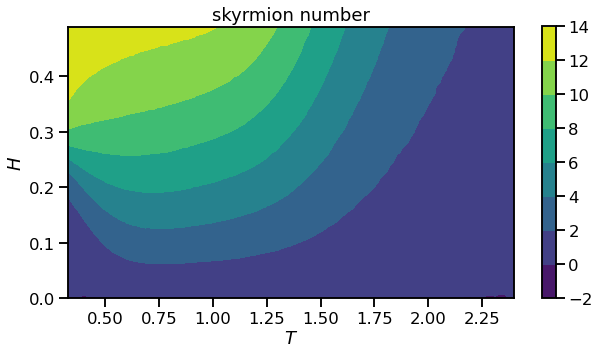

In [6]:
%matplotlib inline
plt.figure(figsize = (10,5))
plt.tricontourf(dfpoints.temperature, dfpoints.field, -dfpoints.Chern/(4*np.pi))
plt.title("skyrmion number")
plt.ylabel(r"$H$")
plt.xlabel(r"$T$")
plt.colorbar()

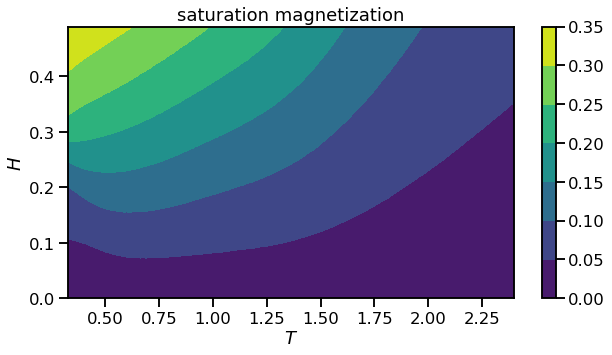

In [7]:
%matplotlib inline
plt.figure(figsize = (10,5))
plt.tricontourf(dfpoints.temperature, dfpoints.field, dfpoints.M)
plt.title("saturation magnetization")
plt.ylabel(r"$H$")
plt.xlabel(r"$T$")
plt.colorbar()

## Use ***MCdata.bootstrap*** to obtain estimation for property

In [8]:
# define the function to get the specific heat from the fluctuation of energy.
def specific_heat(E, E2, T):
    return (E2 - E**2) / T**2 * 72**2

# Using the bootstrap method to get the specific heat
dfpoints["Cv"], dfpoints["Cv_err"] = MCdata.bootstrap(mcdata.rawdata, columns = [ "E", "E2", "temperature"], func = specific_heat)

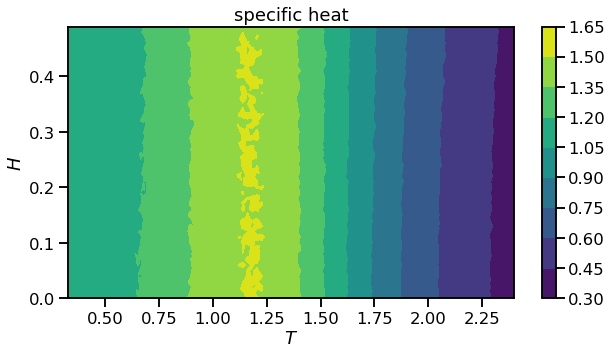

In [9]:
%matplotlib inline
plt.figure(figsize = (10,5))

plt.tricontourf(dfpoints.temperature, dfpoints.field, dfpoints.Cv)
plt.title("specific heat")
plt.ylabel(r"$H$")
plt.xlabel(r"$T$")
plt.colorbar()

## Demo on line plots

In [10]:
T1, T2, T3, T4, T5 = (dfpoints.temperature.unique()[0],
                  dfpoints.temperature.unique()[20],
                  dfpoints.temperature.unique()[40],
                  dfpoints.temperature.unique()[60],
                  dfpoints.temperature.unique()[80])
cut1 = (dfpoints.temperature == T1)
cut2 = (dfpoints.temperature == T2)
cut3 = (dfpoints.temperature == T3)
cut4 = (dfpoints.temperature == T4)
cut5 = (dfpoints.temperature == T5)

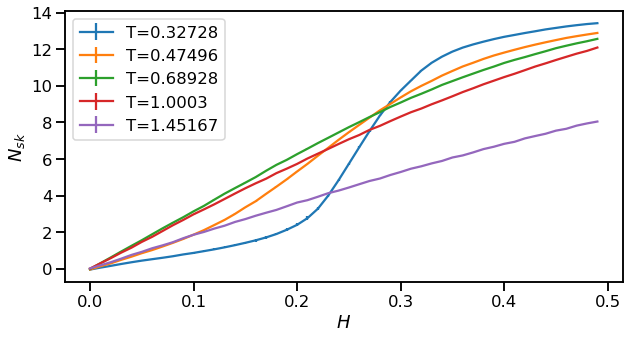

In [12]:
plt.figure(figsize = (10,5))
plt.errorbar(dfpoints.field[cut1],-dfpoints.Chern[cut1]/4/np.pi,dfpoints.Chern_err[cut1]/4/np.pi, label = "T="+str(T1))
plt.errorbar(dfpoints.field[cut2],-dfpoints.Chern[cut2]/4/np.pi,dfpoints.Chern_err[cut2]/4/np.pi, label = "T="+str(T2))
plt.errorbar(dfpoints.field[cut3],-dfpoints.Chern[cut3]/4/np.pi,dfpoints.Chern_err[cut3]/4/np.pi, label = "T="+str(T3))
plt.errorbar(dfpoints.field[cut4],-dfpoints.Chern[cut4]/4/np.pi,dfpoints.Chern_err[cut4]/4/np.pi, label = "T="+str(T4))
plt.errorbar(dfpoints.field[cut5],-dfpoints.Chern[cut5]/4/np.pi,dfpoints.Chern_err[cut5]/4/np.pi, label = "T="+str(T5))
plt.ylabel(r"$N_{sk}$")
plt.xlabel(r"$H$")
plt.legend()

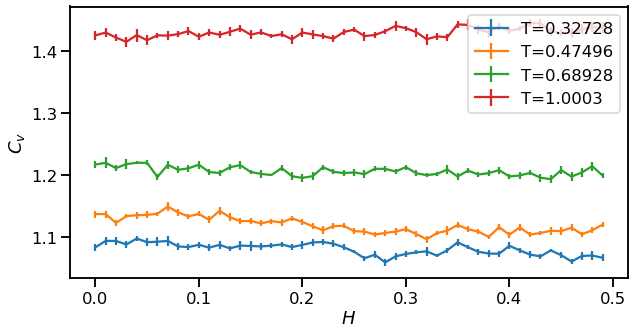

In [13]:
plt.figure(figsize = (10,5))
plt.errorbar(dfpoints.field[cut1],dfpoints.Cv[cut1],dfpoints.Cv_err[cut1], label = "T="+str(T1))
plt.errorbar(dfpoints.field[cut2],dfpoints.Cv[cut2],dfpoints.Cv_err[cut2], label = "T="+str(T2))
plt.errorbar(dfpoints.field[cut3],dfpoints.Cv[cut3],dfpoints.Cv_err[cut3], label = "T="+str(T3))
plt.errorbar(dfpoints.field[cut4],dfpoints.Cv[cut4],dfpoints.Cv_err[cut4], label = "T="+str(T4))
plt.ylabel(r"$C_v$")
plt.xlabel(r"$H$")
plt.legend()

## EOF